<a href="https://colab.research.google.com/github/norikata/biomodeling1/blob/master/repressor_simulaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical simulation of repressor dynamics

April 26, 2020

**Norihiro Katayama, Ph.D.**

Biomodeling (Biosystem Engineering course)

Graduate School of Information Sciences

Tohoku University, Japan

## Definition of the system
### ODEs
\begin{align}
    \frac{dm}{dt} &= a_0 + \frac{a_1}{1 + Kp^n} -a_2m \\
    \frac{dp}{dt} &= b_1m -b_2p
\end{align}

### Parameters

$a_0 = 1$,  $a_1=9$,  $a_2=1$

$b_1=1$,  $b_2=1$

$K = 1$

$n=3$

## Python code



### Import libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### ODEs and parameter values

In [0]:
# model parameters    
K=1 
n=3
a=[1, 9, 1] # = [a0, a1, a2]
b=[0, 1, 1] # = [  , b1, b2]

# right hand side of the ODEs
def dmdt(m, p):
    return a[0] + a[1]/(1 + K*p**n) -a[2]*m

def dpdt(m, p):
    return b[1]*m -b[2]*p

def represor_odes(x, t):
    return [dmdt(x[0], x[1]), dpdt(x[0], x[1])]

### Solve the ODEs

In [0]:

time = np.linspace(0.0, 10.0, 1000) # sampling time
x0 = [0.1, 0.2] # = [m0, p0] initial values
x = odeint(represor_odes, x0, time) # numerical integration
m = x[:,0]
p = x[:,1]

### Time course plot

#### mRNA concentration

Text(0, 0.5, 'mRNS')

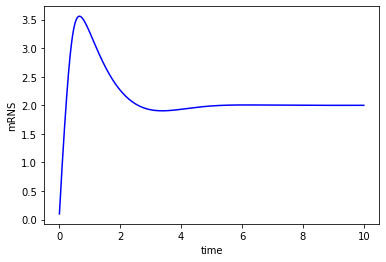

In [4]:
# graph plotting (separated)
plt.figure()
plt.plot(time, m, color='blue')
plt.xlabel("time")
plt.ylabel("mRNS")

#### Repressor concentration

Text(0, 0.5, 'repressor')

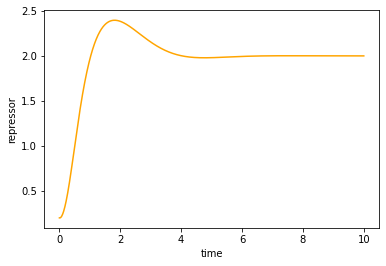

In [5]:
plt.figure()
plt.plot(time, p, color='orange')
plt.xlabel("time")
plt.ylabel("repressor")

### Trajectory of state point

Text(0.5, 1.0, 'Phase plane plot')

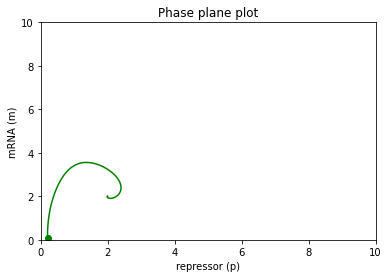

In [6]:
plt.figure()
plt.plot(p[0], m[0], marker='o', color='green', markersize=6) # Initial values

plt.plot(p, m, color='green')
plt.xlim(0,10)
plt.ylim(0,10)

plt.xlabel('repressor (p)') 
plt.ylabel('mRNA (m)')  
plt.title('Phase plane plot')

### Nullclines

(0.0, 10.0)

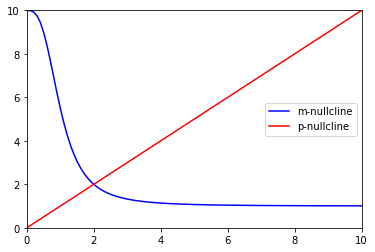

In [7]:
P = np.linspace(0,10,100)

m_nullcline = (a[0] + a[1]/(1 + K*P**n))/a[2]
p_nullcline = b[2]*P/b[1]

plt.figure()
plt.plot(P, m_nullcline, color='blue', label='m-nullcline')
plt.plot(P, p_nullcline, color='red', label='p-nullcline')
plt.legend(loc='center right')

plt.xlim(0,10)
plt.ylim(0,10)


### Quiver plot

(0.0, 10.0)

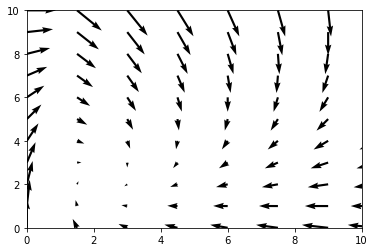

In [8]:
pmin, pmax = 0, 11
mmin, mmax = 0, 11
P2, M2 = np.meshgrid(np.arange(pmin, pmax, 1.5), np.arange(mmin, mmax, 1))
dPdt = dpdt(M2, P2)
dMdt = dmdt(M2, P2)

plt.quiver(P2, M2, dPdt, dMdt)

plt.xlim(0,10)
plt.ylim(0,10)

### Combinations

Text(0.5, 1.0, 'Phase plane plot')

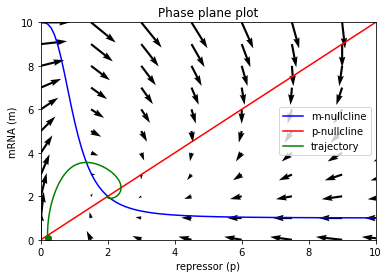

In [9]:
# quiver plot
plt.quiver(P2, M2, dPdt, dMdt) 

# nullclines
plt.plot(P, m_nullcline, color='blue', label='m-nullcline')
plt.plot(P, p_nullcline, color='red', label='p-nullcline')

# trajectory
plt.plot(p[0], m[0], marker='o', color='green', markersize=6) # Initial values
plt.plot(p, m, color='green', label='trajectory')

plt.xlim(0,10)
plt.ylim(0,10)

plt.legend(loc='center right')
plt.xlabel('repressor (p)') 
plt.ylabel('mRNA (m)')  
plt.title('Phase plane plot')